# **OpenCV installation**

In [206]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


**library import**

In [207]:
import cv2
import warnings
import matplotlib.pyplot as plt
import numpy as np

warnings.filterwarnings('ignore')
%matplotlib inline

In [208]:
cv2.__version__ 

'4.5.4'

# OpenCV Basic Operation on Images

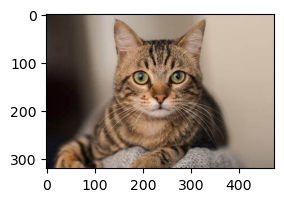

In [209]:
plt.figure(figsize=(4,2)) 
imagedata=plt.imread("../input/catimagedataset/cat.jpg")#Image read 
plt.imshow(imagedata) ##image show 
plt.grid(False)
plt.show()#<matplotlib.image.AxesImage at 0x1396fd2bb50> ignore this messages

In [210]:
imagedata.shape #Image width =320, Hight=474, RGB channel=3

(320, 474, 3)

In [211]:
print("Image Shape: {}".format(imagedata.shape)) #Here we use Format String
print("Image size : Image Height:{}, Image Width:{}, Image Color Channel:{}={}".format(imagedata.shape[0], imagedata.shape[1], imagedata.shape[2],imagedata.size))
#imagedata.shape[0] 0 means 320, if we set 1  then 474, 2 means 3 and when we multiplie all number then we can get 455040

Image Shape: (320, 474, 3)
Image size : Image Height:320, Image Width:474, Image Color Channel:3=455040


In [212]:
def catimageShow(imageTitle, image): #Create a function for easily call anytime
    imageConvert=cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Convert BGR to RGB
    plt.figure(figsize=(4,2))
    plt.imshow(imageConvert)
    plt.title(imageTitle)
    plt.show()

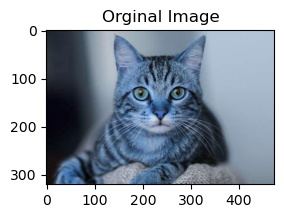

In [213]:
catimageShow('Orginal Image', imagedata) #Here we set priority of color but dimension is same as before

In [214]:
imagedata.shape[:2]

(320, 474)

# Image Masking

Image_mask is one kind of shadow information, Using this mask we can set any formate of this picture.


In [215]:
image_mask=np.zeros(imagedata.shape[:2], dtype="uint8")
#Here np.zeros means all data we set 0 

In [216]:
image_mask #Here we can see the result, all of the data is 0

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [217]:
cv2.rectangle(image_mask, (0,45),(45,90),255,-1) #Now we can see the one small shape of rectangle
#rectangle have four point that's why we see (0,45)(45,90) and we set color 255,
#color 255 means white and color 0 means black

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

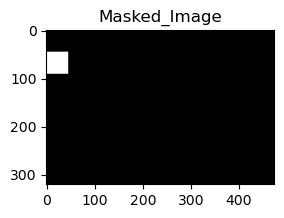

In [218]:
catimageShow("Masked_Image", image_mask) #Here we call catimageShow function and see the masked image 
#Bellow image dimension come from cat image dimension , this is the masked image

# Bitwise Operation
A very important application of bitwise operation in computer vision or image processing is for creating masks of the image. We can also use the operator to add watermarks to an image.

Bitwise operations are performed on an image when we need to extract only the required parts of the image. Consider a situation, in which we need to extract an irregular-shaped object from an image and paste it on another image. That’s exactly when we use bitwise operations on the image to separate the foreground from the background.

OpenCV has inbuilt methods to perform and, or and not operations. They are bitwise_and, bitwise_or, and bitwise_not. Consider the below two black and white images. Let us perform these three operations between these two images and observe the result.

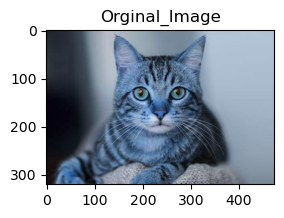

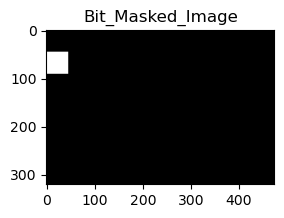

In [219]:
argumentImage={"Image":"../input/catimagedataset/cat.jpg","scharr":0}#Here we created argument as a dictionary, when we want to get gradian Edge or 
#Feature deribativ from a image then we need to use scharr.
imagedata=plt.imread(argumentImage["Image"])#argument image show
catimageShow("Orginal_Image", imagedata)#Orginal image outpot
bit_mask=cv2.bitwise_and(imagedata, imagedata, mask=image_mask)# Here we used bitwise_and operation , as a input imagedata, imaagedata we can 
#get result from this AND operation . 
catimageShow("Bit_Masked_Image", image_mask)#bitwise AND operation outpot

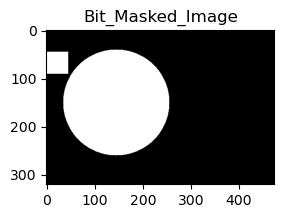

In [220]:
cv2.circle(image_mask, (145,150),110,255,-1)#Draw circle, here 110 is circle redius.
bit_mask=cv2.bitwise_and(imagedata, imagedata, mask=image_mask) # with this circle we want get outpot from bitwise operation
catimageShow("Bit_Masked_Image", image_mask)

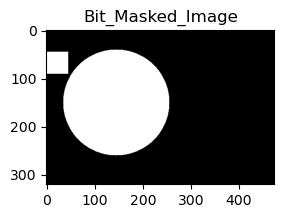

In [221]:
cv2.circle(image_mask, (145,150),110,255,-1)
bit_mask=cv2.bitwise_or(imagedata, imagedata, mask=image_mask)#Here we use biwise_or operation
catimageShow("Bit_Masked_Image", image_mask)

# Image Resize

In [222]:
max(imagedata[0][0])#This particular image max value result 43

43

In [223]:
min(imagedata[0][0]) #This particular image min value result 30

30

In [224]:
imagedata/255
#When we divide imagedata with 255 then we can get result .0 to 1 it's one kind of scalling

#When we want to resize an image we need to do image scaling. And Scaling is done in two ways- 
#Normalization , Standarization. Notes- we don't need standard deviation for doing Normalization.
#But for Standarization we need standard deviation

array([[[0.16862745, 0.14117647, 0.11764706],
        [0.16862745, 0.14117647, 0.11764706],
        [0.16862745, 0.14117647, 0.11764706],
        ...,
        [0.84705882, 0.78039216, 0.70980392],
        [0.88627451, 0.81960784, 0.74901961],
        [0.88627451, 0.81960784, 0.74901961]],

       [[0.16862745, 0.14117647, 0.11764706],
        [0.16862745, 0.14117647, 0.11764706],
        [0.16862745, 0.14117647, 0.11764706],
        ...,
        [0.84313725, 0.77647059, 0.70588235],
        [0.8745098 , 0.80784314, 0.7372549 ],
        [0.8745098 , 0.80784314, 0.7372549 ]],

       [[0.16862745, 0.14117647, 0.11764706],
        [0.16862745, 0.14117647, 0.11764706],
        [0.16862745, 0.14117647, 0.11764706],
        ...,
        [0.83529412, 0.76862745, 0.69803922],
        [0.85882353, 0.79215686, 0.72156863],
        [0.85882353, 0.79215686, 0.72156863]],

       ...,

       [[0.07058824, 0.09019608, 0.11372549],
        [0.04313725, 0.0627451 , 0.08627451],
        [0.03921569, 0

In [225]:
customValueH=120.0/imagedata.shape[0]#Image Height
#Here 120 is magic value, 120 means when new image come then it's Height will be 120.

In [226]:
customValueW=120.0/imagedata.shape[1] #Image Weight 

In [227]:
customValueH

0.375

In [228]:
customValueW

0.25316455696202533

In [229]:
imageDimention = (120, int(imagedata.shape[0]*customValueW))#Now we will calculate for imageDimention , 120 is magic value that's
#is Height and old Height and customeValueW multiply for image Weight

In [230]:
imagedata.shape#old image dimention

(320, 474, 3)

In [231]:
imageDimention #New image dimention

(120, 81)

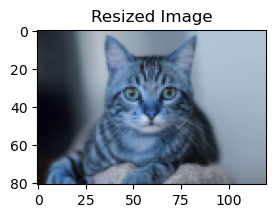

In [232]:
newImage = cv2.resize(imagedata, imageDimention, interpolation = cv2.INTER_AREA)#Here we use cv2.resize command for resize our image
#for resize we take old image(imagedata) and new image shape then interpolate with INTER_AREA .Interpolation means it's old image to new 
#image shape, it's also mixed pixel to new shape and keep the image in INTER_AREA.

catimageShow("Resized Image", newImage)

# Image Rotate

#when we do image augmentation, we will need to do rotate an image. Augmentation means we need to
#improve number of image quantity. So we need to divide them centrally

In [233]:
newImage.shape

(81, 120, 3)

In [234]:
(imageH, imageW)=imagedata.shape[:2]#We set Image Height and Weight in differrent variable 

In [235]:
centerX, centerY = (imageH/2, imageW/2)#Image Height and Weight will divided by Centrally 

In [236]:
cv2.warpAffine

<function warpAffine>

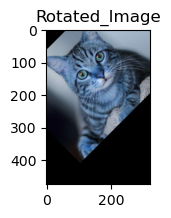

In [237]:
imageRotate=cv2.getRotationMatrix2D((centerX,centerY),45,1.0)# Here we call opencv function cv2.getRotationMatrix2D cause 
#out image is 2D image, 45 means 45 degree angel and 1.0  means scale
rotatenow=cv2.warpAffine(imagedata, imageRotate, (imageH, imageW))#Here we wrap our image with warpAffine command
catimageShow("Rotated_Image", rotatenow)

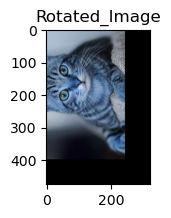

In [238]:
imageRotate=cv2.getRotationMatrix2D((centerX,centerY),90,1.0)#Now image will show 90 degree angel
rotatenow=cv2.warpAffine(imagedata, imageRotate, (imageH, imageW))
catimageShow("Rotated_Image", rotatenow)

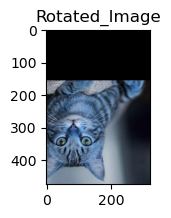

In [239]:
imageRotate=cv2.getRotationMatrix2D((centerX,centerY),180,1.0)#Now image will show 180 degree angel
rotatenow=cv2.warpAffine(imagedata, imageRotate, (imageH, imageW))
catimageShow("Rotated_Image", rotatenow)

# Sobel Operation

What are Sobel and Scharr derivatives in OpenCV

**Understanding image derivatives Before we start extracting the image derivatives using OpenCV, let us first take a moment to understand what image derivatives are and why they are helpful. Image derivatives are highly used in detecting the edges of the image. Image derivatives locate the places in the image where the pixel intensity changes in a drastic manner. This helps us map the boundaries of any image.

**Calculating the derivative of an image using Sobel Operator The Sobel operator is one of the available techniques to extract the derivative of an image. It is a combination of Gaussian Smoothing and differentiation. We can locate the vertical and the horizontal edges separately or together using the cv2.Sobel() function, which takes the following arguments.

**Calculating the derivative of an image using Scharr Operator Scharr is yet another operator which is used to find the derivative of an image. Scharr filter is said to give more accurate results where Sobel filter fails to work correctly. It is very similar to Sobel in terms of implementation using python. We can extract the Scharr derivative of an image using the cv2.Scharr() function, which takes the following arguments.

In [240]:
#Step 01: Convert iMages to Gray
grayimage=cv2.cvtColor(imagedata, cv2.COLOR_RGB2GRAY)

In [241]:
grayimage.shape

(320, 474)

In [242]:
#Step:02- Implementing kernel for edge detection
kernelGen= -1 if argumentImage["scharr"]>0 else 3
#Here we keep one condition that if scharr is greater than 0 then it return -1 else scharr value less than 0 then scharr value or
#derivative value will be 1,2,3 or something random value, here return 3.

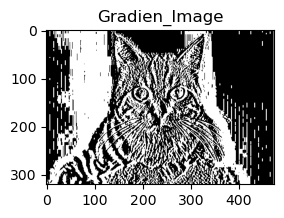

In [243]:
#Here gradient value is derivative of x or y  
gradienImageDataX=cv2.Sobel(grayimage, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=kernelGen)
#Here we define edge as a sobel , grayimage means which one we already convert from RGB, ddepth means derivatib of depth will be
#image floating point 32 bit. derivative of x will 1 and derivative of y will be 0, ksize means kernel size 
gradienImageDataY=cv2.Sobel(grayimage, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=kernelGen)
catimageShow("Gradien_Image", gradienImageDataX)

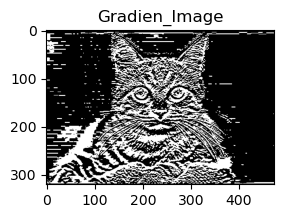

In [244]:
catimageShow("Gradien_Image", gradienImageDataY)

In [245]:
gradienImageDataX

array([[   0.,    0.,    0., ...,   36.,   36.,    0.],
       [   0.,    0.,    0., ...,   32.,   32.,    0.],
       [   0.,    0.,    0., ...,   26.,   26.,    0.],
       ...,
       [   0.,  -50.,    6., ...,   14.,   14.,    0.],
       [   0., -137.,  -36., ...,   14.,   14.,    0.],
       [   0., -188.,  -62., ...,   14.,   14.,    0.]], dtype=float32)

In [246]:
gradienImageDataY

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ..., -16., -24., -28.],
       [  0.,   0.,   0., ..., -14., -18., -20.],
       ...,
       [ 96.,  60.,   8., ...,   8.,   8.,   8.],
       [130.,  79.,   2., ...,   8.,   8.,   8.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32)